In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def f(x):
    return 6*x**3 + 2*x**2 + x

In [14]:
xs = np.arange(-5,5, 0.15)
ys = f(xs)

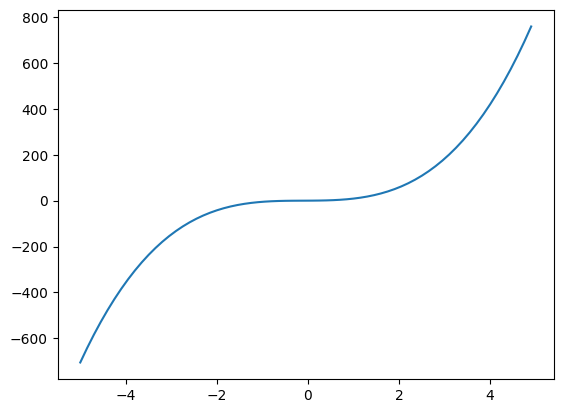

In [15]:
plt.plot(xs, ys)

In [29]:
h = 0.1 * (10 ** 6)
(f(-3 + h) - f(h))/h

-5399850.00147

In [3]:
class Value:

    def __init__(self, data, _check=(), _op='', label=""):
        self.data = data
        self._prev = set(_check)
        self.grad = 0.0
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')


In [4]:
x = Value(3, label="x")
y = Value(4, label="y")
z = x+y; z.lable = "z"
t = Value(69, label="t")
d = (z*t) + (x+y); d.label= "d"
L = z*d; L.label = "L"
L

Value(data=3430)

In [5]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

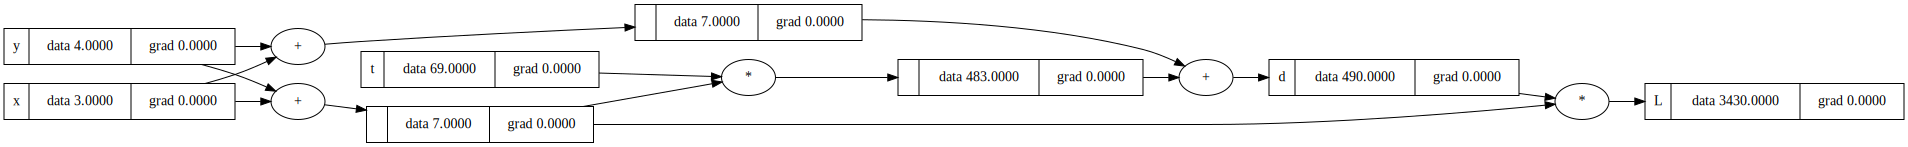

In [6]:
draw_dot(L)

In [1]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)


NameError: name 'a' is not defined